In [1]:
import numpy as np
import pandas as pd
import mglearn as mg
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

reviews_train = load_files('data/aclImdb/train')
text_train, y_train = reviews_train.data, reviews_train.target
text_train = [doc.replace(b"<br />", b"") for doc in text_train]

reviews_test = load_files('data/aclImdb/test')
text_test, y_test = reviews_test.data, reviews_test.target
text_test = [doc.replace(b'<br />', b'') for doc in text_test]


pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
param_grid = {'logisticregression__C': [.001, .01, .1, 1, 10]}

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print(grid.best_score_)
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
X_train = vectorizer.transform(text_train)
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
feature_names = np.array(vectorizer.get_feature_names())

print(feature_names[sorted_by_tfidf[:20]])
print(feature_names[sorted_by_tfidf[-20:]])

/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/arti/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

0.89208
['suplexes' 'gauche' 'hypocrites' 'oncoming' 'galadriel' 'songwriting'
 'emerald' 'mclaughlin' 'sylvain' 'oversee' 'cataclysmic' 'pressuring'
 'uphold' 'thieving' 'inconsiderate' 'ware' 'denim' 'reverting' 'booed'
 'spacious']
['gadget' 'zatoichi' 'demons' 'lennon' 'bye' 'sucks' 'dev' 'weller'
 'sasquatch' 'botched' 'xica' 'darkman' 'woo' 'casper' 'doodlebops'
 'smallville' 'wei' 'scanners' 'steve' 'pokemon']


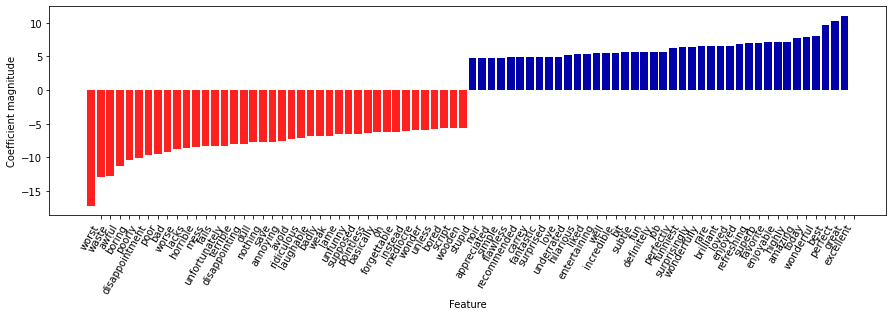

In [3]:
mg.tools.visualize_coefficients(
    grid.best_estimator_.named_steps['logisticregression'].coef_[0],
    feature_names, n_top_features=40)